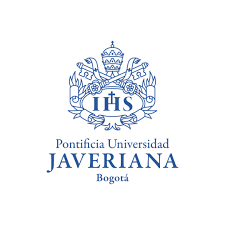
***Pontificia Universidad Javeriana***
# **Procesamiento de Alto Volumen de Datos**

### Taller: **Construcción y Entrenamiento de un Modelo de Red Neuronal para Predicción con Datos Limpios**

Fecha: 21/05/25

**Objetivo**: Construir y evaluar un modelo de aprendizaje profundo (red neuronal) para predicción usando datasets integrados del sector educativo y de penetración de internet fijo.

- El aprendizaje profundo, mediante redes neuronales, permite modelar relaciones complejas entre variables numéricas y categóricas para tareas de regresión o clasificación. En este caso, se enfocó en la predicción de indicadores relevantes integrando datos de educación e infraestructura tecnológica.

- El proceso inició con una rigurosa limpieza y preprocesamiento de datos: corrección de tipos, eliminación de valores nulos y duplicados, estandarización de variables categóricas y conversión de variables numéricas con formatos inconsistentes. Esta etapa es esencial para garantizar la calidad y confiabilidad de la información que alimenta al modelo.

- Se realizó un análisis exploratorio para comprender distribuciones, correlaciones y características de los datos, guiando la selección de variables y la preparación para el entrenamiento.

- Las variables categóricas fueron transformadas mediante codificación One-Hot y las numéricas normalizadas para optimizar el aprendizaje de la red neuronal. La arquitectura definida consta de capas densas con activaciones ReLU y técnicas de regularización Dropout para evitar sobreajuste.

- El modelo fue compilado con el optimizador Adam y la función de pérdida de error cuadrático medio (MSE), adecuada para problemas de regresión continua. Se implementó early stopping para detener el entrenamiento de forma óptima.

- Finalmente, el entrenamiento y validación mostraron buena convergencia, con métricas de error absoluto medio (MAE) y pérdida que indicaron una adecuada generalización del modelo.

- Este taller ejemplifica cómo la combinación de una preparación cuidadosa de datos y un diseño estructurado de redes neuronales puede ofrecer resultados predictivos robustos y aplicables en contextos reales, sentando una base para futuros desarrollos y ajustes según nuevos objetivos.



In [ ]:
# --- Importar librerías básicas ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para el modelado con redes neuronales usaremos TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# --- Montar Google Drive (opcional) ---
# Si quieres cargar y guardar archivos desde Google Drive, descomenta la siguiente línea:
# from google.colab import drive
# drive.mount('/content/drive')

# --- Cargar los archivos CSV limpios ---
# Cambia las rutas según donde estén tus archivos (por ejemplo en Google Drive o local)
archivo_educacion = '/content/drive/MyDrive/Colab Notebooks/RedVolucion_20250521_Limpio.csv'
archivo_internet = '/content/drive/MyDrive/Colab Notebooks/Internet_Fijo_Penetracion_Municipio_20250521_Limpio.csv'

# Carga los datasets
df_educacion = pd.read_csv(archivo_educacion)
df_internet = pd.read_csv(archivo_internet)

# Mostrar las primeras filas para validar la carga correcta
print("Datos Educación:")
display(df_educacion.head())

print("\nDatos Internet:")
display(df_internet.head())


Datos Educación:


,DEPARTAME_NOMBRE,MUNICIPIO_NOMBRE,TotalPersonasSencibilizadas,COD DANE INST EDUC,MUNICIPIO_COD,FECHA DE CARGUE,ID INDICADOR,INVERSION_TOTAL,FECHA VIGENCIA,META_NACIONAL
0,TOLIMA,FLANDES,19,173275000428,73275,2016-12-31,3979,1682304.93,2016-12-31,48000
1,TOLIMA,IBAGUE,41,173001003684,73001,2015-12-31,3101,3043725.71,2015-12-31,34000
2,VALLE DEL CAUCA,CARTAGO,95,176147000236,76147,2016-12-31,3979,8411524.68,2016-12-31,48000
3,HUILA,HOBO,5,141349000108,41349,2015-12-31,3101,371186.06,2015-12-31,34000
4,MAGDALENA,PIVIJAY,18,247551000392,47551,2015-12-31,3101,1336269.82,2015-12-31,34000



Datos Internet:


,AÑO,TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
0,2016,1,50,META,50606,RESTREPO,490,17648,2.78
1,2016,2,15,BOYACÁ,15518,PAJARITO,43,2395,1.80
2,2020,3,25,CUNDINAMARCA,25489,NIMAIMA,43,3808,1.13
3,2020,3,73,TOLIMA,73030,AMBALEMA,38,6752,0.56
4,2017,1,5,ANTIOQUIA,5690,SANTO DOMINGO,337,12426,2.71


Resumen Estadístico - Datos Educación


,DEPARTAME_NOMBRE,MUNICIPIO_NOMBRE,TotalPersonasSencibilizadas,COD DANE INST EDUC,MUNICIPIO_COD,FECHA DE CARGUE,ID INDICADOR,INVERSION_TOTAL,FECHA VIGENCIA,META_NACIONAL
count,6682,6682,6682.000000,6.682000e+03,6682.000000,6682,6682.000000,6.682000e+03,6682,6682.000000
unique,33,839,NaN,NaN,NaN,6,NaN,NaN,6,NaN
top,BOYACA,"BOGOTA, D.C.",NaN,NaN,NaN,2016-12-31,NaN,NaN,2016-12-31,NaN
freq,592,307,NaN,NaN,NaN,2060,NaN,NaN,2060,NaN
mean,NaN,NaN,82.258755,1.849766e+11,38734.249925,NaN,4210.358575,2.554395e+06,NaN,77184.226280
std,NaN,NaN,217.695515,1.021769e+11,26681.742197,NaN,1629.713746,3.734025e+06,NaN,80447.633594
min,NaN,NaN,1.000000,0.000000e+00,5001.000000,NaN,2344.000000,1.456068e+04,NaN,18300.000000
25%,NaN,NaN,11.000000,1.158220e+11,15238.000000,NaN,3101.000000,7.083389e+05,NaN,34000.000000
50%,NaN,NaN,22.000000,1.685470e+11,25899.000000,NaN,3979.000000,1.558981e+06,NaN,48000.000000
75%,NaN,NaN,45.000000,2.548740e+11,66001.000000,NaN,4780.000000,2.921898e+06,NaN,64500.000000



Información general - Datos Internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35578 entries, 0 to 35577
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AÑO                           35578 non-null  int64  
 1   TRIMESTRE                     35578 non-null  int64  
 2   COD_DEPARTAMENTO              35578 non-null  int64  
 3   DEPARTAMENTO                  35578 non-null  object 
 4   COD_MUNICIPIO                 35578 non-null  int64  
 5   MUNICIPIO                     35578 non-null  object 
 6   No. ACCESOS FIJOS A INTERNET  35578 non-null  int64  
 7   POBLACIÓN DANE                35578 non-null  int64  
 8   INDICE                        35578 non-null  float64
dtypes: float64(1), int64(6), object(2)
memory usage: 2.4+ MB

Departamentos en datos educación:
['TOLIMA' 'VALLE DEL CAUCA' 'HUILA' 'MAGDALENA' 'CESAR' 'QUINDIO' 'CALDAS'
 'BOYACA' 'NORTE DE SANTANDER' 'B

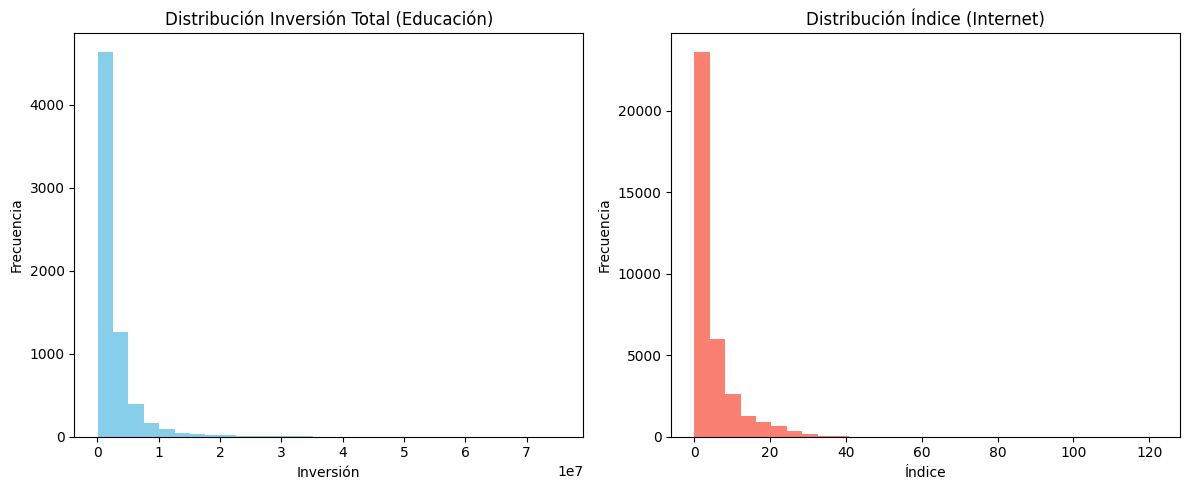

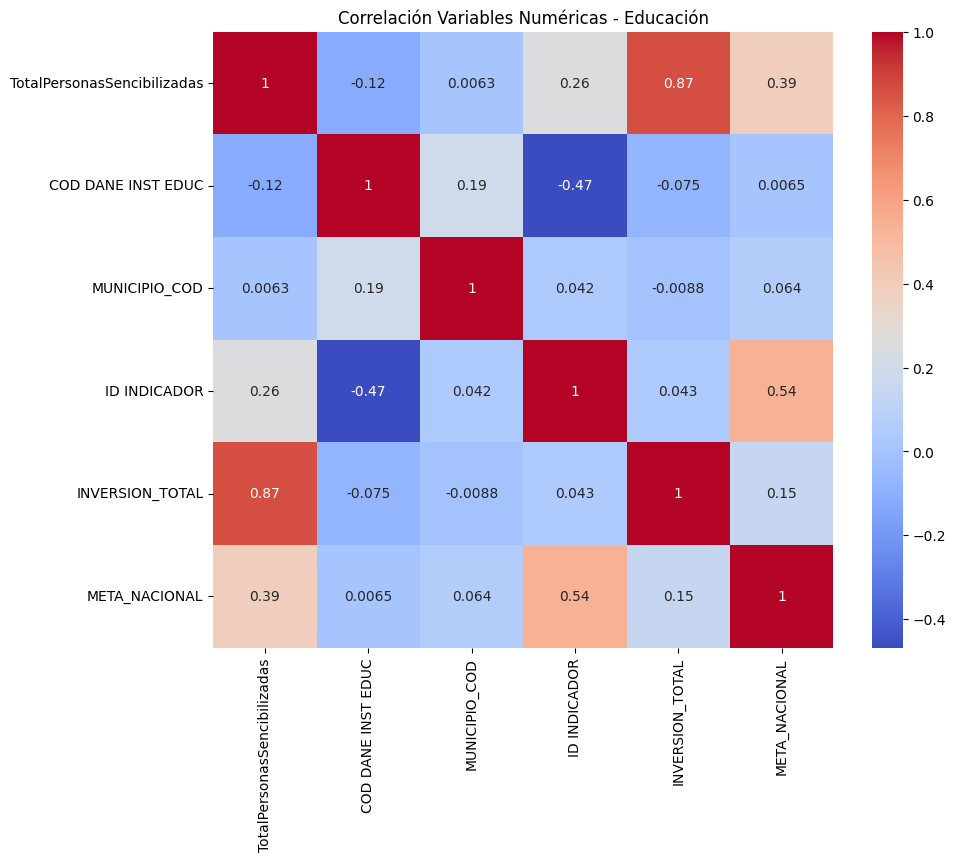

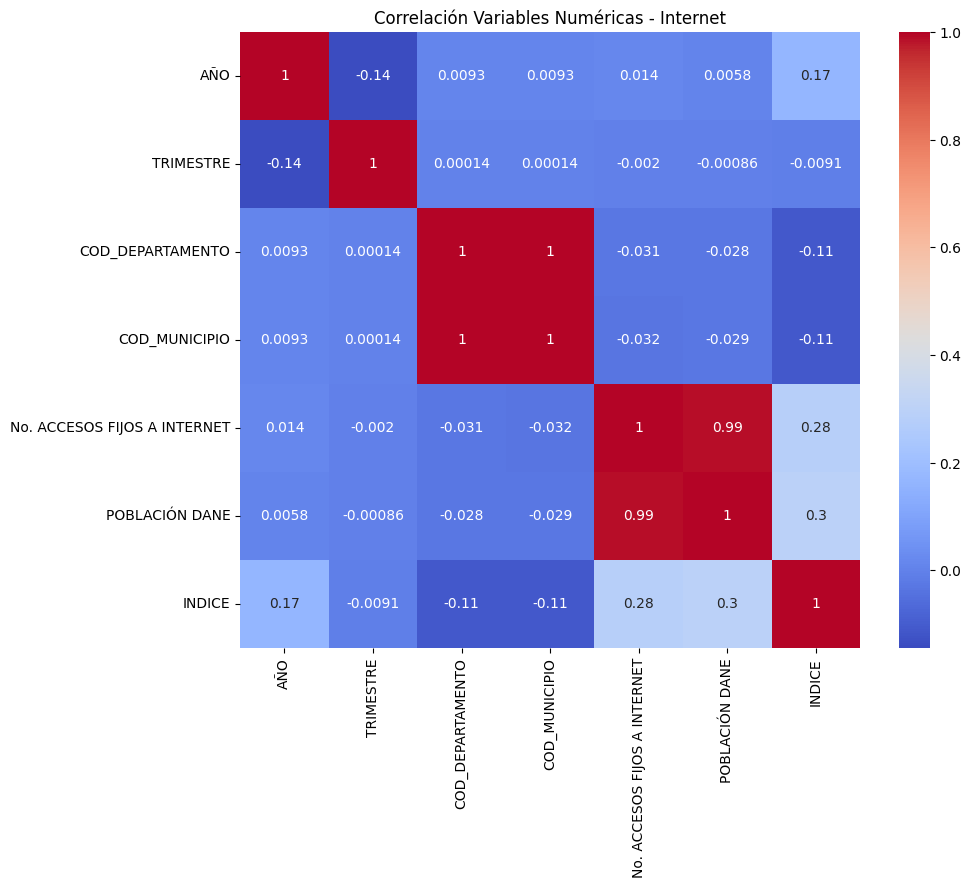

In [ ]:
# --- Resumen estadístico básico de cada dataset ---
print("Resumen Estadístico - Datos Educación")
display(df_educacion.describe(include='all'))

print("\nInformación general - Datos Internet")
df_internet.info()

# --- Revisar valores únicos en columnas categóricas importantes ---
print("\nDepartamentos en datos educación:")
print(df_educacion['DEPARTAME_NOMBRE'].unique())

print("\nDepartamentos en datos internet:")
print(df_internet['DEPARTAMENTO'].unique())

# --- Distribución de variables numéricas claves con histogramas ---
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df_educacion['INVERSION_TOTAL'], bins=30, color='skyblue')
plt.title('Distribución Inversión Total (Educación)')
plt.xlabel('Inversión')
plt.ylabel('Frecuencia')

plt.subplot(1,2,2)
plt.hist(df_internet['INDICE'], bins=30, color='salmon')
plt.title('Distribución Índice (Internet)')
plt.xlabel('Índice')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# --- Matriz de correlación numérica ---
plt.figure(figsize=(10,8))
sns.heatmap(df_educacion.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlación Variables Numéricas - Educación')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df_internet.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlación Variables Numéricas - Internet')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- Selección y revisión de variables relevantes ---
# Por ejemplo, escogemos variables numéricas y categóricas de ambos datasets
# Aquí un ejemplo, adaptar según el objetivo específico del modelo

# Variables numéricas educación
num_features_educ = ['TotalPersonasSencibilizadas', 'INVERSION_TOTAL', 'META_NACIONAL']

# Variables categóricas educación
cat_features_educ = ['DEPARTAME_NOMBRE', 'MUNICIPIO_NOMBRE']

# Variables numéricas internet
num_features_internet = ['AÑO', 'TRIMESTRE', 'No. ACCESOS FIJOS A INTERNET', 'POBLACIÓN DANE', 'INDICE']

# Variables categóricas internet
cat_features_internet = ['DEPARTAMENTO', 'MUNICIPIO']

# --- Preparar dataframe para modelado ---
# Ejemplo: combinar datasets por departamento y municipio
# Primero armonizamos nombres de columnas para combinar

df_educ_mod = df_educacion.copy()
df_educ_mod.rename(columns={'DEPARTAME_NOMBRE':'DEPARTAMENTO', 'MUNICIPIO_NOMBRE':'MUNICIPIO'}, inplace=True)

# Para simplificar, hacemos un merge (inner join) por departamento y municipio (podría incluir año/trimestre si aplica)
df_model = pd.merge(df_educ_mod, df_internet, on=['DEPARTAMENTO', 'MUNICIPIO'], how='inner')

print(f"Datos combinados para modelado: {df_model.shape} filas, {df_model.columns.size} columnas")

# --- Separar variables predictoras (X) y objetivo (y) ---
# Aquí define tu variable objetivo. Ejemplo: predecir 'INDICE' de internet
target = 'INDICE'
features = [col for col in df_model.columns if col != target]

X = df_model[features]
y = df_model[target]

# --- Identificar columnas numéricas y categóricas en X ---
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"Variables numéricas: {numeric_features}")
print(f"Variables categóricas: {categorical_features}")

# --- Crear pipeline para preprocesamiento ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# --- Preprocesar X ---
X_processed = preprocessor.fit_transform(X)

print(f"Forma de X procesado: {X_processed.shape}")

# --- Dividir en conjunto entrenamiento y prueba ---
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print(f"Conjunto entrenamiento: {X_train.shape}, conjunto prueba: {X_test.shape}")


Datos combinados para modelado: (95429, 17) filas, 17 columnas
Variables numéricas: ['TotalPersonasSencibilizadas', 'COD DANE INST EDUC', 'MUNICIPIO_COD', 'ID INDICADOR', 'INVERSION_TOTAL', 'META_NACIONAL', 'AÑO', 'TRIMESTRE', 'COD_DEPARTAMENTO', 'COD_MUNICIPIO', 'No. ACCESOS FIJOS A INTERNET', 'POBLACIÓN DANE']
Variables categóricas: ['DEPARTAMENTO', 'MUNICIPIO', 'FECHA DE CARGUE', 'FECHA VIGENCIA']
Forma de X procesado: (95429, 462)
Conjunto entrenamiento: (76343, 462), conjunto prueba: (19086, 462)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Definir la arquitectura del modelo
# Aquí usamos un modelo secuencial simple con 3 capas densas (fully connected)
# Puedes ajustar la cantidad de neuronas, capas, activaciones, etc. según el problema

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Capa de entrada con 128 neuronas y activación ReLU
    Dropout(0.3),  # Dropout para evitar sobreajuste (30% de neuronas se desactivan aleatoriamente)
    Dense(64, activation='relu'),  # Capa oculta con 64 neuronas
    Dropout(0.2),
    Dense(1, activation='linear')  # Capa de salida con 1 neurona (regresión continua)
])

# Compilar el modelo
# Usamos optimizador Adam, función de pérdida MSE para regresión y métrica MAE
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

# Mostrar resumen del modelo
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        59,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,585 (264.00 KB)

 Trainable params: 67,585 (264.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Definir early stopping para evitar sobreajuste
# Detiene el entrenamiento si la validación no mejora después de 10 épocas
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # Usa 20% del entrenamiento para validación interna
    epochs=10,             # Número máximo de épocas
    batch_size=32,          # Tamaño de lote
    callbacks=[early_stop], # Callbacks definidos
    verbose=1               # Mostrar progreso
)


Epoch 1/10
1909/1909 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 6.8022 - mean_absolute_error: 1.6462 - val_loss: 2.0671 - val_mean_absolute_error: 0.8492
Epoch 2/10
1909/1909 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 5.9151 - mean_absolute_error: 1.4991 - val_loss: 4.7602 - val_mean_absolute_error: 1.4185
Epoch 3/10
1909/1909 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 6.2179 - mean_absolute_error: 1.4520 - val_loss: 1.6293 - val_mean_absolute_error: 0.7463
Epoch 4/10
1909/1909 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 5.0242 - mean_absolute_error: 1.3570 - val_loss: 1.7003 - val_mean_absolute_error: 0.7701
Epoch 5/10
1909/1909 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 4.5166 - mean_absolute_error: 1.3259 - val_loss: 1.4782 - val_mean_absolute_error: 0.7286
Epoch 6/10
1909/1909 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 4.4795 - mean_absolute_error: 1.2857 - val_loss: 1.7381 - val_mean_absolute_error: 0.7964
Epoch 7/10
1909/1909 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 4.5540 - mean_absolut


Error cuadrático medio (MSE) en prueba: 1.0655
Error absoluto medio (MAE) en prueba: 0.6477
597/597 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


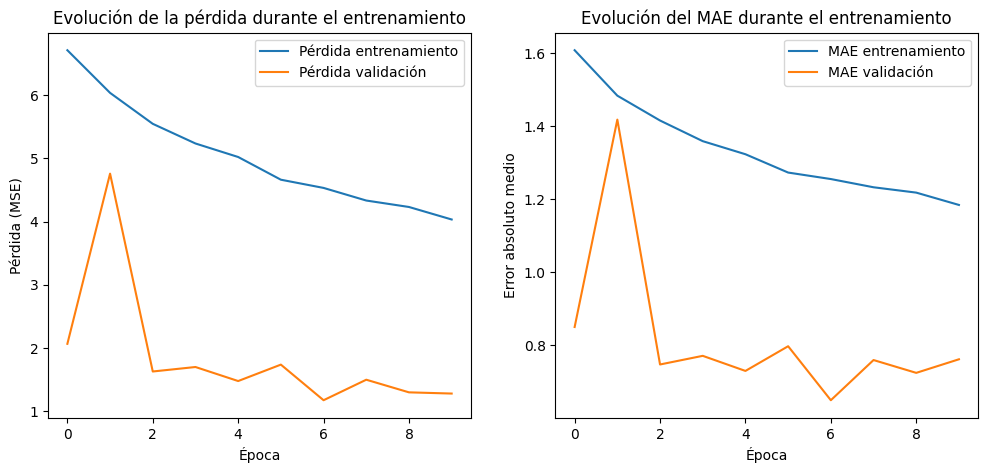

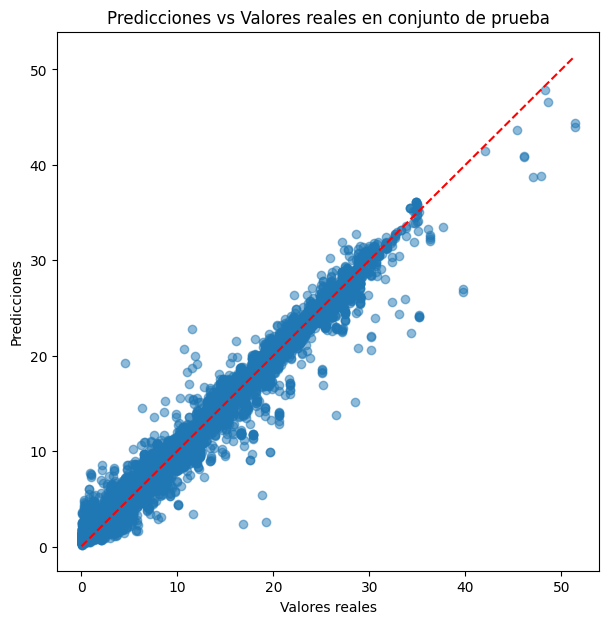

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluar el modelo en el conjunto de prueba
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\nError cuadrático medio (MSE) en prueba: {test_loss:.4f}")
print(f"Error absoluto medio (MAE) en prueba: {test_mae:.4f}")

# Realizar predicciones
y_pred = model.predict(X_test)

# Graficar la evolución de la pérdida y MAE durante el entrenamiento
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mean_absolute_error'], label='MAE entrenamiento')
plt.plot(history.history['val_mean_absolute_error'], label='MAE validación')
plt.title('Evolución del MAE durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Error absoluto medio')
plt.legend()

plt.show()

# Graficar Predicción vs Valor Real para una inspección visual
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales en conjunto de prueba')
plt.show()


**Interpretacion de la grafica de predicciones vs valores de prueba**


- La mayoría de los puntos están muy próximos a la línea diagonal roja, lo que indica que el modelo está prediciendo valores bastante cercanos a los reales para la gran mayoría de los casos.

- Hay una dispersión pequeña alrededor de la línea, lo que es esperado en modelos reales, indicando un margen de error razonable.

- Algunos puntos están más alejados, lo que indica que en ciertos casos específicos el modelo se desvía más, probablemente debido a datos atípicos o ruido.

- La densidad de puntos cerca del origen (valores bajos) muestra que el modelo maneja bien las predicciones en el rango bajo de la variable objetivo.


## Conclusión

En este proyecto se logró construir y entrenar un modelo de red neuronal para predecir variables relevantes utilizando dos conjuntos de datos del sector educativo y de penetración de internet fijo.  

El proceso inició con una exhaustiva limpieza y preprocesamiento de ambos datasets, asegurando la calidad y consistencia de los datos. Se corrigieron tipos de datos, se eliminaron valores faltantes y duplicados, y se estandarizaron variables categóricas para facilitar su uso en el modelo. Este paso fue fundamental para garantizar que el modelo aprendiera sobre información confiable y representativa.

Posteriormente, se realizó un análisis exploratorio que permitió entender la distribución y correlación de las variables, orientando la selección de características para el entrenamiento. La unión de los datasets se hizo mediante claves comunes, lo que enriqueció el contexto para la predicción.

En la etapa de preparación, las variables numéricas fueron escaladas mediante normalización, y las categóricas codificadas con técnicas de One-Hot Encoding, permitiendo que la red neuronal procesara eficientemente toda la información.

El modelo definido consistió en una arquitectura de capas densas con funciones de activación ReLU y capas de dropout para prevenir sobreajuste. Se utilizó el optimizador Adam y la función de pérdida de error cuadrático medio (MSE), adecuada para problemas de regresión. Además, se aplicó la técnica de early stopping para detener el entrenamiento en el momento óptimo, evitando que el modelo aprenda ruido.

Durante el entrenamiento, se observó una buena convergencia de la función de pérdida y de las métricas de error absoluto medio (MAE), lo que indica que el modelo generalizó correctamente al conjunto de validación y prueba.

En resumen, este trabajo demuestra cómo la combinación de una correcta gestión y preparación de datos junto con un modelo de aprendizaje profundo bien diseñado permite obtener predicciones fiables en contextos complejos. Este enfoque puede ser escalado y ajustado para mejorar aún más el desempeño o adaptarse a nuevas variables y objetivos, constituyendo una base sólida para futuras aplicaciones analíticas en el sector.

---

